# Publicaciones NILM/NILMTK - Estado del Arte

Se usa el programa Publish or Perish para realizar una busqueda de las publicaciones en GoogleScholar

El criterio de busqueda contempla las publicaciones que en su titulo tengan las siguientes palabras:NILMTK

La busqueda se realiza entre los años 2010 y 2019 (consulta al 4 de mayo de 2022)

Idea original de Oliver Parson:

http://blog.oliverparson.co.uk/2015/03/overview-of-nilm-field.html
https://github.com/oliparson/nilm-papers

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [37]:
df=pd.read_csv('PoPCites.csv')#, encoding = 'latin1')
df.sort_values(by='Cites', inplace=True, ascending=False)
print(df.shape)
df.head(3)

(731, 26)


,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
61,629,"J Kelly, W Knottenbelt","The UK-DALE dataset, domestic appliance-level ...",2015.0,Scientific data,nature.com,https://www.nature.com/articles/sdata20157,https://scholar.google.com/scholar?cites=54866...,62,2022-05-04 15:31:42,...,NaN,NaN,629,89.86,315,2,7.0,… toolkit NILMTK 38 includes an importer for U...,https://www.nature.com/articles/sdata20157,https://scholar.google.com/scholar?q=related:x...
76,609,"J Kelly, W Knottenbelt",Neural nilm: Deep neural networks applied to e...,2015.0,Proceedings of the 2nd ACM international …,dl.acm.org,https://dl.acm.org/doi/abs/10.1145/2821650.282...,https://scholar.google.com/scholar?cites=16532...,77,2022-05-04 15:31:42,...,NaN,NaN,609,87.00,305,2,7.0,… All our code is written in Python and we mak...,https://arxiv.org/pdf/1507.06594,https://scholar.google.com/scholar?q=related:u...
0,473,"N Batra, J Kelly, O Parson, H Dutta, ...",NILMTK: An open source toolkit for non-intrusi...,2014.0,Proceedings of the 5th …,dl.acm.org,https://dl.acm.org/doi/abs/10.1145/2602044.260...,https://scholar.google.com/scholar?cites=54416...,1,2022-05-04 15:31:42,...,NaN,NaN,473,59.13,95,5,8.0,… algorithm compatible with NILMTK. This allow...,https://arxiv.org/pdf/1404.3878,https://scholar.google.com/scholar?q=related:C...


# Numero de publicaciones NILM por año

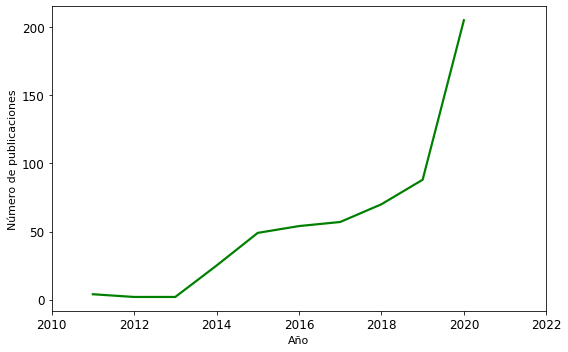

In [43]:
rcParams['figure.figsize'] = (8, 5)
nonzero_years = df[(df.Year>=2010) & (df.Year<=2020)]
pd.DataFrame(nonzero_years.Year.value_counts()).sort_index().plot(color='g', linewidth=2.2, fontsize=12, legend=False)
plt.xlabel('Año', fontsize=11)
plt.ylabel('Número de publicaciones', fontsize=11)
a=[2010, 2012, 2014,2016,2018,2020, 2022,2024]
plt.xticks(a)
plt.xlim(2010, 2022)
plt.yticks(np.arange(0, 220, 50))
plt.tight_layout() #no corta el eje

# Numero de citaciones por Autor

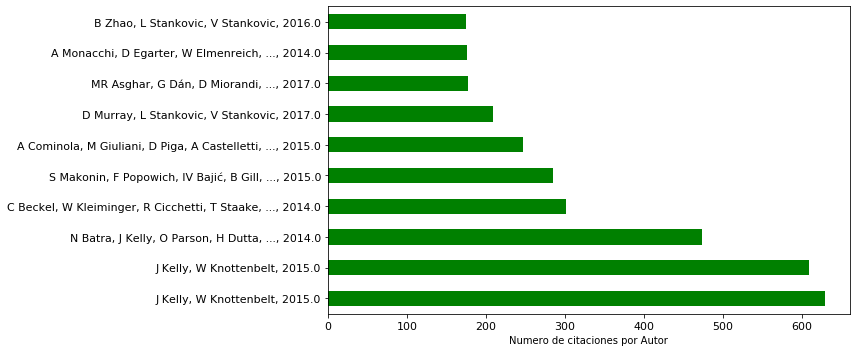

In [44]:
plt.figure(figsize=(12,5))
df['Author, year'] = df['Authors'] + ', ' + [str(x) for x in df['Year']]
df.set_index('Author, year').Cites.head(10).plot(kind='barh', color='g', fontsize=11)
plt.xlabel('Numero de citaciones por Autor')
plt.ylabel('')
plt.tight_layout()

# Numero de citaciones por año

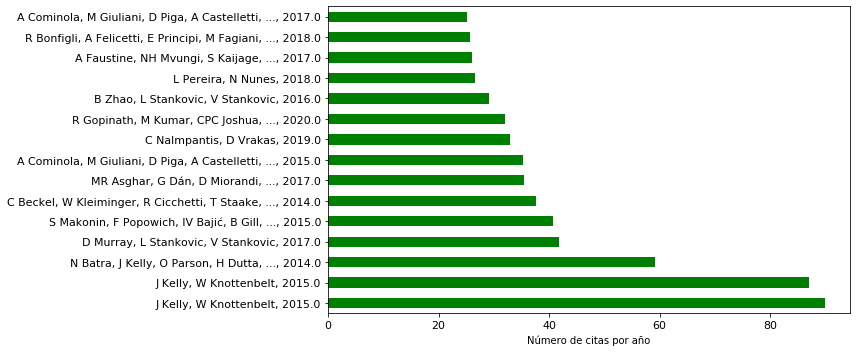

In [45]:
plt.figure(figsize=(12,5))
df.set_index('Author, year').sort_values(by='CitesPerYear',ascending=False)['CitesPerYear'].head(15).plot(kind='barh', color='g', fontsize=11)
plt.ylabel('')
plt.xlabel('Número de citas por año')
plt.tight_layout()

# Citaciones en Scopus

In [46]:
df=pd.read_csv('PoPCites_scopus.csv')#, encoding = 'latin1')
df.sort_values(by='Cites', inplace=True, ascending=False)
print(df.shape)
df.head(3)

(18, 26)


,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract,FullTextURL,RelatedURL
0,292,N. Batra,NILMTK: An open source toolkit for non-intrusi...,2014,e-Energy 2014 - Proceedings of the 5th ACM Int...,NaN,NaN,https://www.scopus.com/inward/citedby.uri?part...,1,2022-05-04 16:46:46,...,265.0,276.0,292,36.50,292,1,8,NaN,NaN,NaN
1,53,O. Parson,Dataport and NILMTK: A building data set desig...,2016,2015 IEEE Global Conference on Signal and Info...,NaN,NaN,https://www.scopus.com/inward/citedby.uri?part...,2,2022-05-04 16:46:46,...,210.0,214.0,53,8.83,53,1,6,NaN,NaN,NaN
2,29,J. Kelly,NILMTK v0.2: A non-intrusive load monitoring t...,2014,BuildSys 2014 - Proceedings of the 1st ACM Con...,NaN,NaN,https://www.scopus.com/inward/citedby.uri?part...,3,2022-05-04 16:46:46,...,182.0,183.0,29,3.63,29,1,8,NaN,NaN,NaN


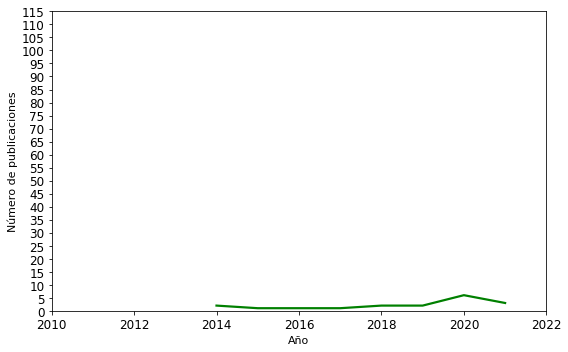

In [47]:
rcParams['figure.figsize'] = (8, 5)
nonzero_years = df[(df.Year>=2010) & (df.Year<=2022)]
pd.DataFrame(nonzero_years.Year.value_counts()).sort_index().plot(color='g', linewidth=2.2, fontsize=12, legend=False)
plt.xlabel('Año', fontsize=11)
plt.ylabel('Número de publicaciones', fontsize=11)
a=[2010, 2012, 2014,2016,2018,2020, 2022]
plt.xticks(a)
plt.xlim(2010, 2022)
plt.yticks(np.arange(0, 120, 5))
plt.tight_layout() #no corta el eje

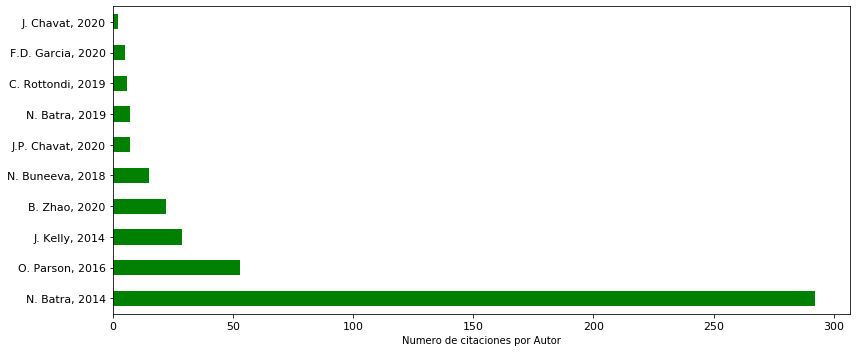

In [48]:
plt.figure(figsize=(12,5))
df['Author, year'] = df['Authors'] + ', ' + [str(x) for x in df['Year']]
df.set_index('Author, year').Cites.head(10).plot(kind='barh', color='g', fontsize=11)
plt.xlabel('Numero de citaciones por Autor')
plt.ylabel('')
plt.tight_layout()

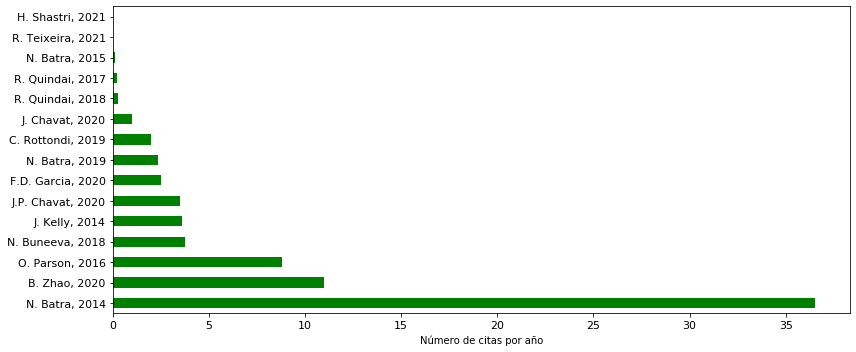

In [49]:
plt.figure(figsize=(12,5))
df.set_index('Author, year').sort_values(by='CitesPerYear',ascending=False)['CitesPerYear'].head(15).plot(kind='barh', color='g', fontsize=11)
plt.ylabel('')
plt.xlabel('Número de citas por año')
plt.tight_layout()